# Fundamentos de procesamiento digital de imágenes

### Prof. Arturo González Vega
### Alumna: Salma Patricia Gutiérrez Rivera

## Segundo examen parcial

__1. Haga una función llamada ImPotencia que, dada una imagen, calcule su potencia promedio. Para realizar el cálculo utilice el teorema de Parseval que dice lo siguiente:__

$$
P_f = \frac{1}{MN}\sum_u\sum_v|F(u,v)|^2
$$

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import exp

In [2]:
def magnitud_dft(imagen):
    """Esta función solo sirve con imágenes BGR,
    aunque sean a escala de grises. Usa cv2.imread(imagen, 0)"""
    dft = cv2.dft(np.float32(imagen), flags = cv2.DFT_COMPLEX_OUTPUT) # Transformada de la imagen
    dft_shift = np.fft.fftshift(dft) # Centramos la transformada
    magnitud = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) # Magnitud del espectro
    
    return magnitud

In [12]:
def ImPotencia(espectro):
    M, N = espectro.shape
    potencia = np.sum(espectro * espectro) / (M * N)
    
    return potencia

__2. Haga una función FiltraGaussiana que, dada una imagen, el tipo de filtro (pasabajos o pasaaltos) y el valor de $\sigma$, realice un filtrado con una función Gaussiana con la desviación indicada.__

In [52]:
def kernel_gaussiano(P, Q, sigma, omega = 0):
    kernel = np.zeros((P, Q))
    
    if omega == 0: # Filtro pasabajos
        for u in range(P):
            for v in range(Q):
                D_cuadrada = (u - 0.5 * P)**2 + (v - 0.5 * Q)**2
                kernel[u][v] = exp(- 0.5 * D_cuadrada / sigma**2)
    else: # Filtro pasaaltos
        for u in range(P):
            for v in range(Q):
                D_cuadrada = (u - 0.5 * P)**2 + (v - 0.5 * Q)**2
                kernel[u][v] = 1.0 - exp(- (D_cuadrada - sigma**2)**2 / (D_cuadrada * omega**2))
                
    return kernel

In [60]:
def FiltraGaussiana(imagen_dft, sigma, omega = 0):
    P, Q = imagen_dft.shape
    kernel = kernel_gaussiano(P, Q, sigma, omega)
    aplicar_filtro = imagen_dft * kernel
    descentrar = np.fft.ifftshift(aplicar_filtro)
    invertir = np.fft.ifft2(descentrar)
    img_filtrada = np.abs(invertir)
    
    return img_filtrada

__3. Utilizando las dos funciones anteriores y la imagen I FigP0401(test_pattern).tif:__

__a)__ Calcule y reporte el valor de la potencia promedio $P_I$ de la imagen.

In [14]:
img1 = cv2.imread('FigP0401(test_pattern).tif', 0)
img1_dft = magnitud_dft(img1)
img1_potencia = ImPotencia(img1_dft)

In [34]:
print("La potencia de la imagen es", img1_potencia)

La potencia de la imagen es 11998180119.937023


__b)__ Para σ = 16, aplique un filtro pasabajos a la imagen I. Guarde la imagen en IB. Calcule la potencia a IB.

In [65]:
descentrar = np.fft.ifftshift(img1_dft)
invertir = np.fft.ifft2(descentrar)
img_recuperada = np.abs(invertir)

In [61]:
#IB = FiltraGaussiana(img1_dft, 16.0)

In [62]:
#IB_potencia = ImPotencia(IB)

#print("La potencia de IB es", IB_potencia)

La potencia de IB es 45136.98647378034


Text(0.5, 1.0, 'Imagen filtrada')

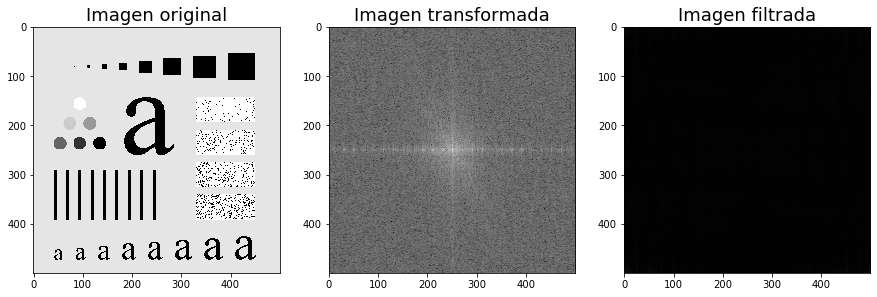

In [66]:
img1_dft_resaltada = 20 * np.log(img1_dft)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(img1, cmap = 'gray')
plt.title('Imagen original', size = 18)
fig.add_subplot(1, 3, 2)
plt.imshow(img1_dft_resaltada, cmap = 'gray')
plt.title('Imagen transformada', size = 18)
fig.add_subplot(1, 3, 3)
plt.imshow(img_recuperada, cmap = 'gray')
plt.title('Imagen recuperada', size = 18)